# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


set working directory to guitarist-net and add to path

In [2]:
# %cd /content/drive/Othercomputers/My MacBook Pro/guitarist-net
%cd /content/drive/MyDrive/Research/guitarist-net

/content/drive/Othercomputers/My MacBook Pro/guitarist-net


install requirements

In [3]:
!pip install -r requirements.txt &> /dev/null

imports

In [4]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from plot_listen.listen import play
from plot_listen.plot import plot, plot_multi_stfts, plot_diff_multi_stfts
from globals import *
from data.gset_midi_dataset import GsetMidiDataset
from midi_synth.midi_synth import MidiSynth
from train.model_trainer import ModelTrainer
from util import torch_to_numpy, numpy_to_torch

# Load Data/Model

get datasets

In [5]:
train_dataset = GsetMidiDataset()

Type a number to select an option:
	0)	test_player-00_gset-midi_1.0s.npz
	1)	train_player-not00_gset-midi_1.0s.npz
	2)	test_player-00_gset-midi_3.0s.npz
	3)	train_player-not00_gset-midi_3.0s.npz
	4)	test_player-00_solo_gset-midi_1.0s.npz
	5)	train_player-not00_solo_gset-midi_1.0s.npz
	6)	train_player-05_fingerstyle_gset-midi_3.0s.npz
	7)	valid_player-00_fingerstyle_gset-midi_3.0s.npz
	8)	test_players-0304_fingerstyle_gset-midi_3.0s.npz
Selection: 6
train_player-05_fingerstyle_gset-midi_3.0s.npz


In [6]:
test_dataset = GsetMidiDataset()

Type a number to select an option:
	0)	test_player-00_gset-midi_1.0s.npz
	1)	train_player-not00_gset-midi_1.0s.npz
	2)	test_player-00_gset-midi_3.0s.npz
	3)	train_player-not00_gset-midi_3.0s.npz
	4)	test_player-00_solo_gset-midi_1.0s.npz
	5)	train_player-not00_solo_gset-midi_1.0s.npz
	6)	train_player-05_fingerstyle_gset-midi_3.0s.npz
	7)	valid_player-00_fingerstyle_gset-midi_3.0s.npz
	8)	test_players-0304_fingerstyle_gset-midi_3.0s.npz
Selection: 7
valid_player-00_fingerstyle_gset-midi_3.0s.npz


create model

In [7]:
synth = MidiSynth()

In [8]:
print(synth)

MidiSynth(
  (context_network): ContextNetwork(
    (linear1): Linear(in_features=12, out_features=32, bias=True)
    (leakyReLU): LeakyReLU(negative_slope=0.01)
    (gru): GRU(32, 64, batch_first=True)
    (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (linear2): Linear(in_features=64, out_features=32, bias=True)
  )
  (mono_network): MonoNetworkSmall(
    (string_emb_layer): Embedding(6, 6)
    (linear1): Linear(in_features=40, out_features=128, bias=True)
    (leakyReLU1): LeakyReLU(negative_slope=0.01)
    (gru): GRU(128, 192, batch_first=True)
    (linear2): Linear(in_features=192, out_features=128, bias=True)
    (leakyReLU2): LeakyReLU(negative_slope=0.01)
    (layer_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (dense_amplitudes): Linear(in_features=128, out_features=102, bias=True)
    (dense_filter_coeffs): Linear(in_features=128, out_features=65, bias=True)
  )
  (harmonic_oscillator): HarmonicOscillator(
    (upsample): Upsample(sc

create trainer

In [9]:
trainer = ModelTrainer(synth, train_dataset, test_dataset)

load checkpoint

In [10]:
trainer.load_checkpoint(load_latest=True)

Type a number to select an option:
	0)	2022-11-15 07:09PM MIDI Synth : train midi synth
	1)	2022-11-18 11:24AM MIDI Synth : reduced model capacity
	2)	2022-11-18 05:05PM MIDI Synth : midi synth with sc osc and noise
	3)	2022-11-18 06:44PM MIDI Synth : train with mfcc input
	4)	2022-11-19 01:17PM MIDI Synth : mfcc with slightly larger model
	5)	2022-11-29 05:03PM MIDI Synth : no string emb
	6)	2022-11-30 07:46PM MIDI Synth : pitch adjustment
	7)	2022-12-08 01:44PM MIDI Synth : lr=0.0001
	8)	2023-02-17 10:56AM MIDI Synth : spectral loss alpha = 2
	9)	2023-02-17 11:39AM MIDI Synth : spectral loss alpha = 1_5
	10)	2023-03-23 07:57PM MIDI Synth : alpha=8.0
	11)	2023-03-24 10:44AM MIDI Synth : resume prev with now working F0
	12)	2023-03-24 11:53AM MIDI Synth : working f0, alpha=8.0
	13)	2023-03-24 01:03PM MIDI Synth : resume prev
	14)	2023-03-27 02:36PM MIDI Synth : alpha1
	15)	2023-03-27 07:57PM MIDI Synth : test context
	16)	2023-03-28 11:44AM MIDI Synth : overfit-batch4_lr-3e4
	17)	2023-

# Eval

## Get Original + Resynth Audio

Get Testing Loss

In [11]:
print(trainer.validation_loss_values[-1])
print(trainer.training_loss_values[-1])

8.478100299835205
4.956603254590716


Get Original and Synthesized Audio

In [ ]:
i = 2
ex_item = train_dataset[i]
original_audio = ex_item['mic_audio']
resynth_audio = torch_to_numpy(synth(numpy_to_torch(ex_item['conditioning']).unsqueeze(0))['audio'].squeeze(0))


In [ ]:
print(original_audio.shape)
print(resynth_audio.shape)

(48000,)
(48000,)


Original Audio

In [ ]:
play(original_audio)

Resynth Audio

In [ ]:
play(resynth_audio)

## Plot MIDI Conditioning

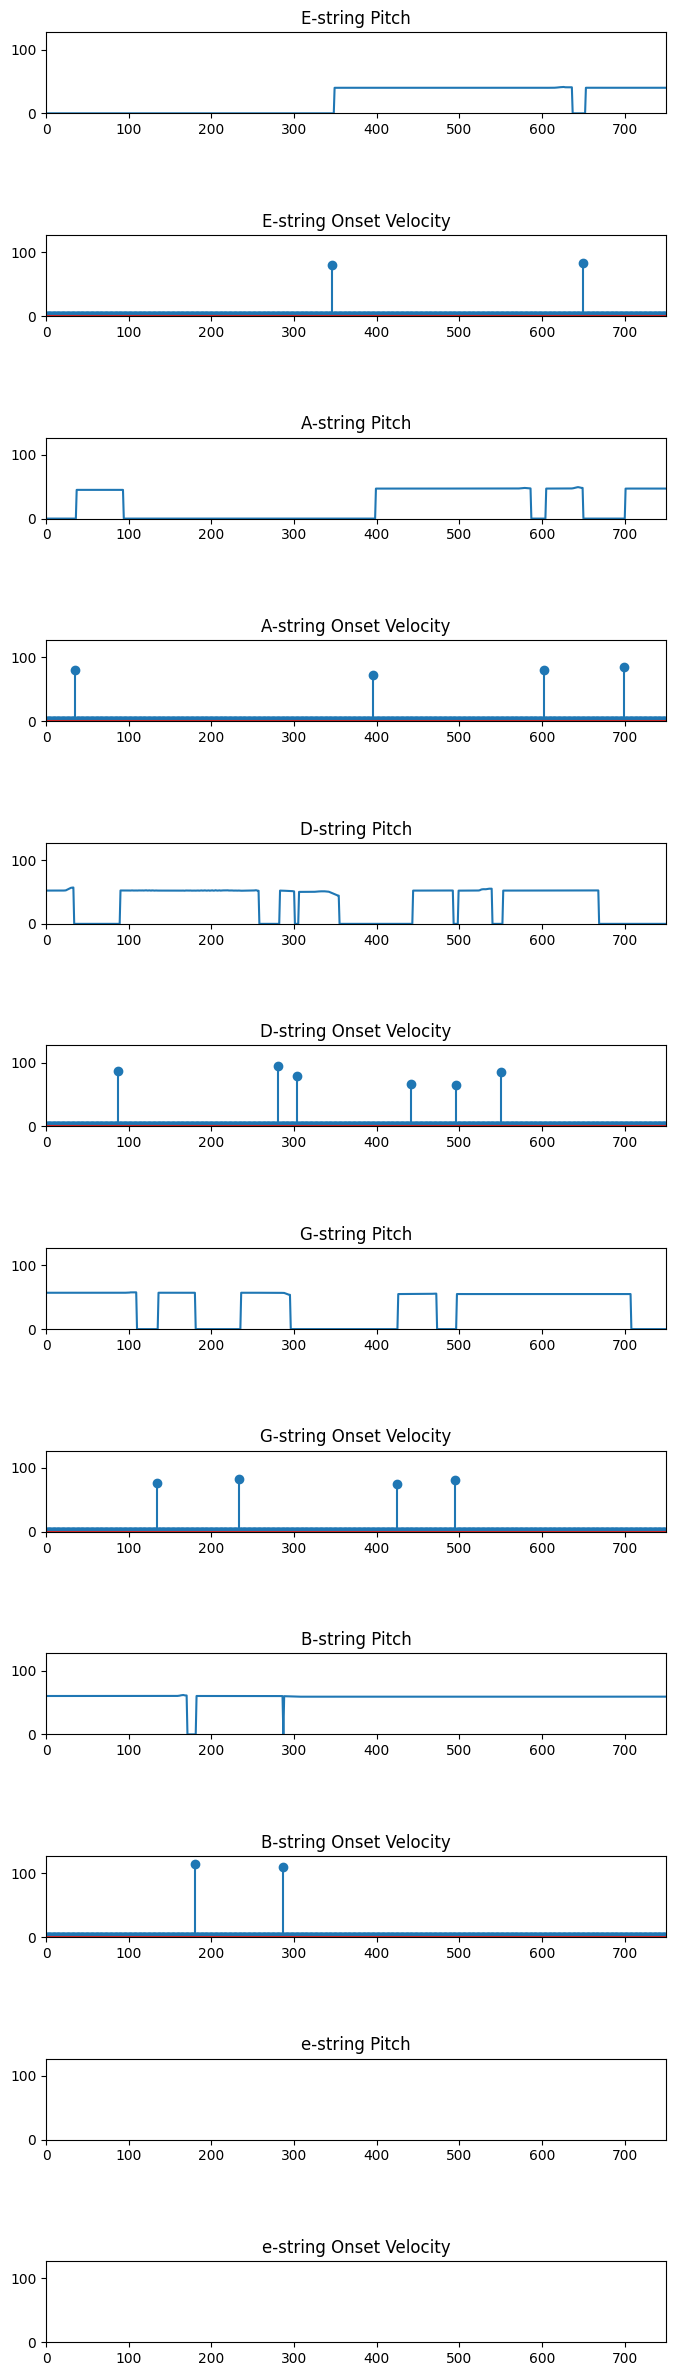

In [ ]:
from plot_listen.plot import plot_midi_conditioning

plot_midi_conditioning(ex_item['conditioning'])

## Plot Multi-scale STFTs

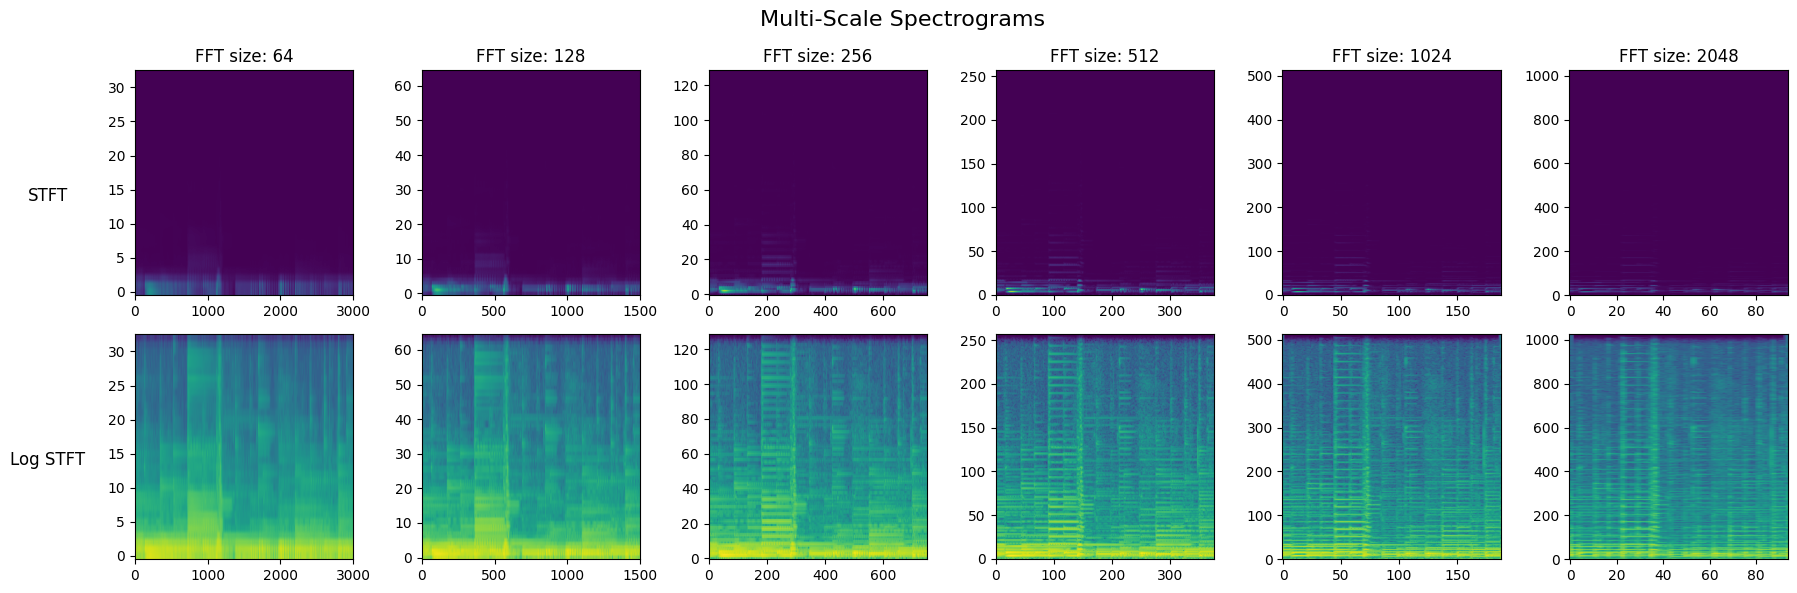

In [ ]:
plot_multi_stfts(original_audio)

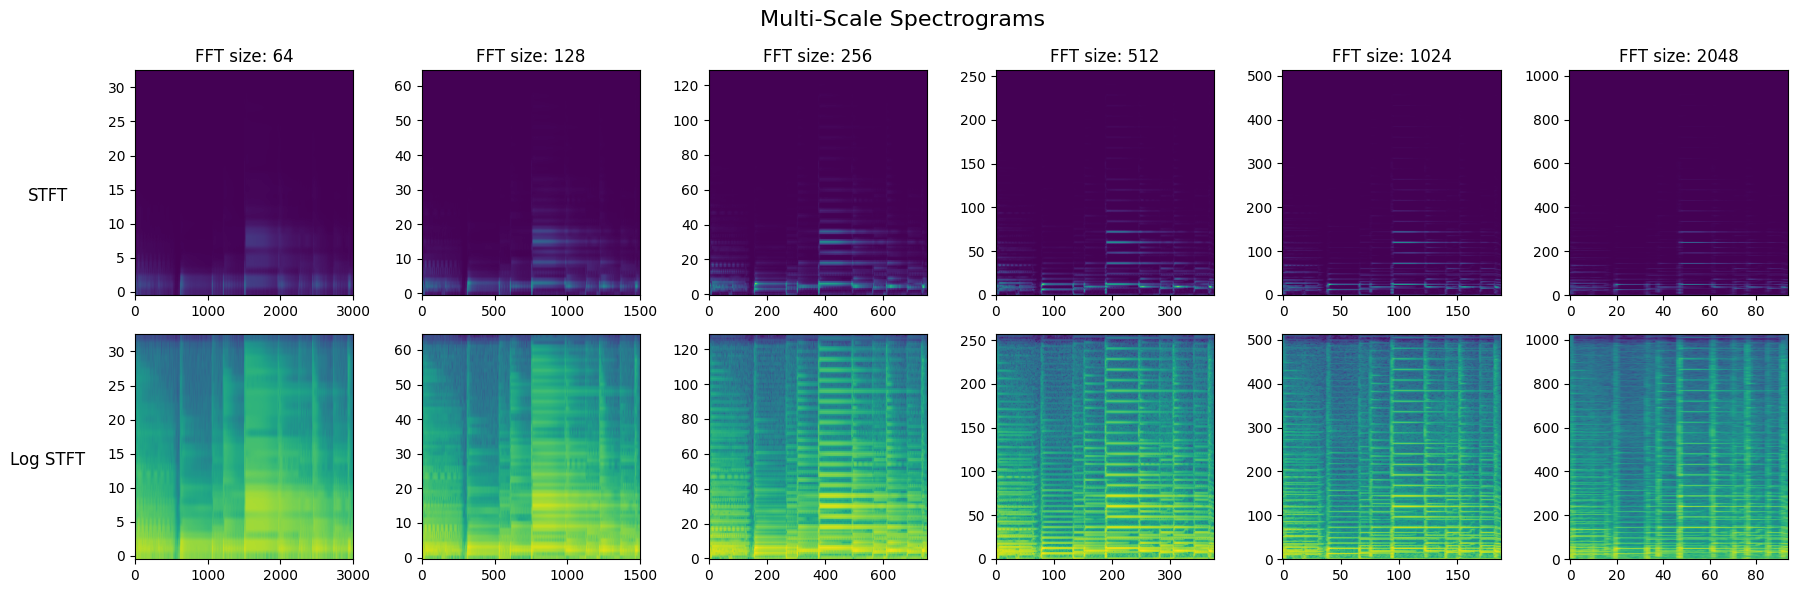

In [ ]:
plot_multi_stfts(resynth_audio)

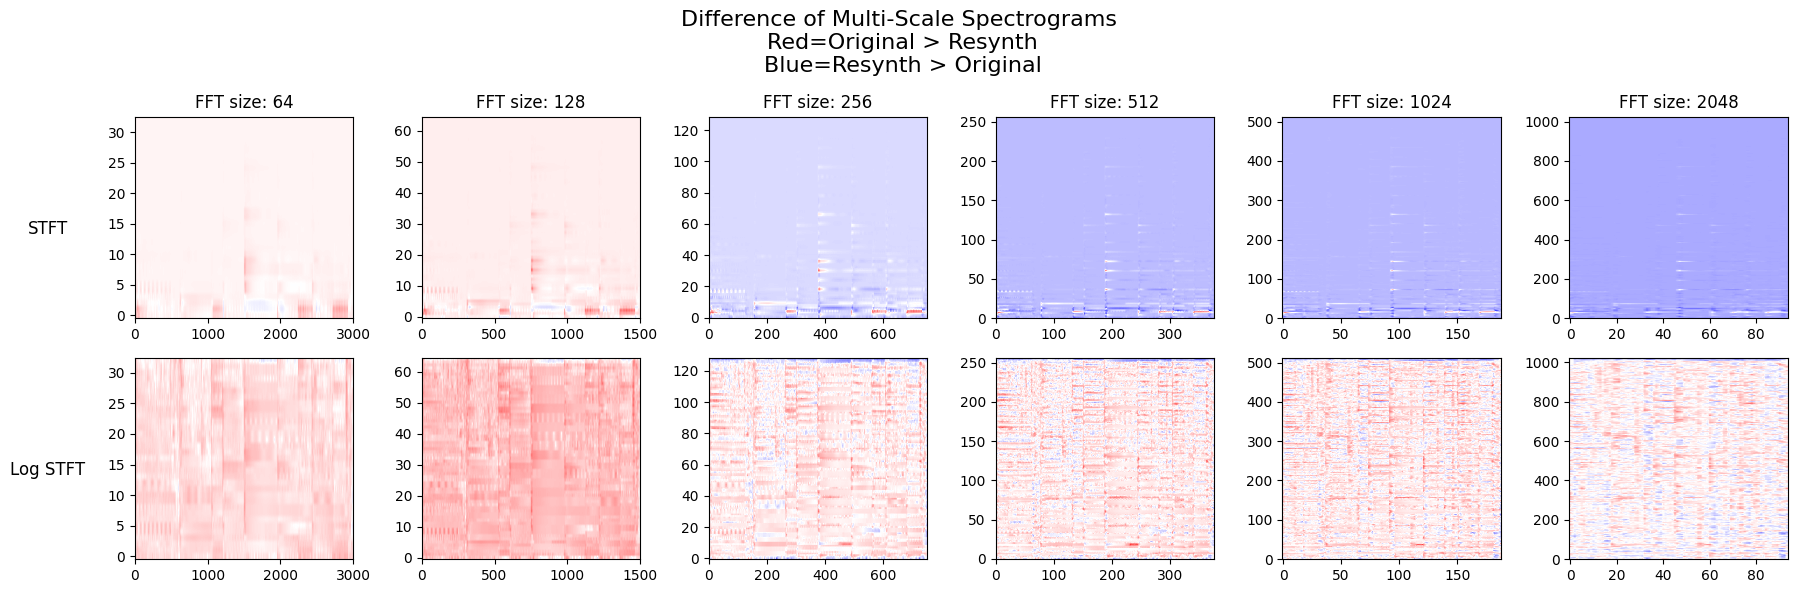

In [ ]:
plot_diff_multi_stfts(original_audio, resynth_audio, standard_scale=False)

## Plot Reverb FIR

tensor(0.6150, device='cuda:0', grad_fn=<MulBackward0>)

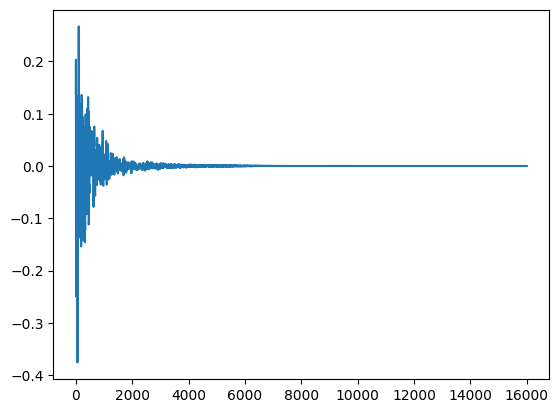

In [ ]:
fir = torch_to_numpy(synth.reverb.generate_fir()[0])



plot(fir)
synth.compute_regularization_loss()

## Inspect Inharmonicity

In [ ]:

betas = synth.harmonic_oscillator.inharm_betas
for i, let in enumerate(GUITAR_STRING_LETTERS):
  # betas[i].data = torch.tensor(-1000.0).to(DEVICE)
  b = torch.sigmoid(betas[i].data)
  print(let, b)




E tensor(0.0001, device='cuda:0')
A tensor(3.3530e-05, device='cuda:0')
D tensor(5.2779e-05, device='cuda:0')
G tensor(2.8910e-05, device='cuda:0')
B tensor(6.6382e-05, device='cuda:0')
e tensor(2.2740e-05, device='cuda:0')


## Plot loss after a certain point

In [14]:
valid_loss_vals = trainer.validation_loss_values
print(len(valid_loss_vals))

17240


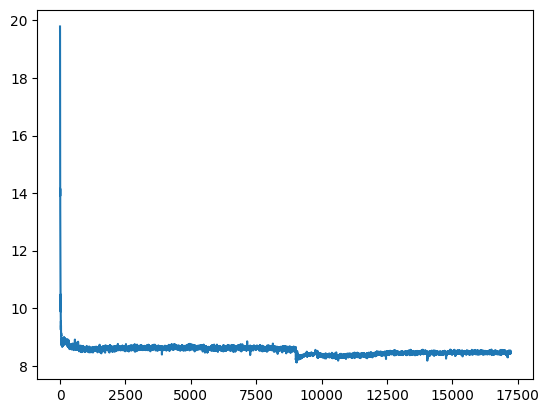

In [15]:
plot(valid_loss_vals)

In [16]:
index_of_min = np.argmin(valid_loss_vals)
index_of_min

9047

## Inspect Harmonic + Noise Parts separately, per string